In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train =  pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
test = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
print(train.isnull().any().any())
print(train.isnull().sum().sum())
train[train['y'].isnull()]

True
1


,x,y
213,3530.157369,NaN


In [5]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


**We can Delete rows with missing value**


In [31]:
train = train.drop(213)#delete row containing NaN

**Making Sure**

In [55]:
train.isnull().any().any()

False

**Count of y colum in now 700**

In [7]:
train.describe()

,x,y
count,700.000000,700.000000
mean,54.985939,49.939869
std,134.681703,29.088388
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,3530.157369,108.871618


**Normalize the data**

In [9]:
train_norm = (train-train.min())/(train.max()-train.min())
test_norm = (test-test.min())/(test.max()-test.min())

In [10]:
train_norm.head()
x_train=train_norm['x']
y_train=train_norm['y']



**Here we can see the outliers which was from row 213**

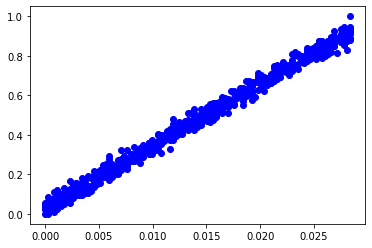

In [32]:
plt.scatter(x_train,y_train,c='blue')


**Now we have nice linear data**

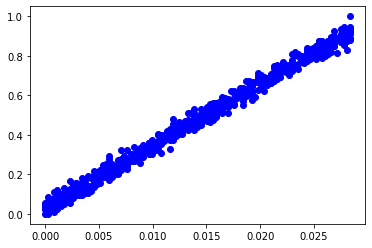

In [19]:
x_train=train_norm['x']
y_train=train_norm['y']
plt.scatter(x_train,y_train,c='blue')

**Calculate mean squared function**

y=wx+b
w=weight 
b=constant

In [33]:
#mean squared cost fuction
def cost(x,y,w,b):
    n=x.shape[0]
    yhat=0.0
    diff=0.0
    for i in range(n):
        if i!=213:
            yhat=w*x[i]+b#function is linear as y=mx+c
            diff=diff+(yhat-y[i])**2
    diff=diff/(2*n)
    return diff

**until convergence:**<br>
**w=𝑤−𝛼*∂𝐽(𝑤,𝑏)/∂𝑤,**<br>
**b=𝑏−𝛼*∂𝐽(𝑤,𝑏)/∂𝑏**<br>

∂𝐽(𝑤,𝑏)/∂𝑤=sum((f(x)-y)*x))/m<br> 
∂𝐽(𝑤,𝑏)/∂𝑏=sum(f(x)-y))/m

In [34]:
#calculate gradient
def calc_gradient(x,y,w,b):
    m=x.shape[0]
    yhat=0.0
    dj_dw=0.0
    dj_db=0.0
    for i in range(m):
        if i!=213:
            yhat=np.dot(w,x[i])+b
            # dj_dw=dj_dw+(yhat)
            # dj_db=dj_db+(yhat)
            dj_dw=dj_dw+(yhat-y[i])*x[i]
            dj_db=dj_db+(yhat-y[i])
    #         if(i%100==0):
    #             print(f'Found :{dj_dw,dj_db}')
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

**until convergence:** <br>
w=𝑤−𝛼∂𝐽(𝑤,𝑏)/∂𝑤,<br>
b=𝑏−𝛼*∂𝐽(𝑤,𝑏)/∂𝑏*

In [35]:
def gradient_descent(x,y,w,b,pd_hist,w_hist,alpha,iter):
    dw=0.0
    db=0.0
    w_prev=0.0
    for i in range(iter):
        dw,db=calc_gradient(x,y,w,b)
        pd_hist.append(cost(x,y,w,b))
        w=w-alpha*dw
        if abs(w_prev-w)<0.00001:
            break
        w_prev=w
        w_hist.append(w)
        b=b-alpha*db            
        if (i%10==0):
            print(f'Caculating the weight and constant:{w,b}')
        
    return w,b,pd_hist,w_hist

In [37]:
x_train=train_norm['x']
y_train=train_norm['y']
w=0.0
b=0.0
pd_hist=[]
w_hist=[]
iterations=8000
alpha=0.2
w_f,b_f,pd_hist,w_hist=gradient_descent(x_train,y_train,w,b,pd_hist,w_hist,alpha,iterations)
print(f'Found the weight and constant:{w_f,b_f}')

Caculating the weight and constant:(666.1319384509883, 9.973705300042852)
Caculating the weight and constant:(1.1405093188411348e+31, 1.708683283294741e+29)
Caculating the weight and constant:(1.9556411486496316e+59, 2.9298939374000827e+57)
Caculating the weight and constant:(3.353354715398301e+87, 5.023914360454922e+85)
Caculating the weight and constant:(5.750026202429154e+115, 8.614549209102921e+113)
Caculating the weight and constant:(9.859619436262017e+143, 1.4771441698965534e+142)


C:\Users\sijan\AppData\Local\Temp/ipykernel_2732/51378177.py:9: RuntimeWarning: overflow encountered in double_scalars
  diff=diff+(yhat-y[i])**2


Caculating the weight and constant:(1.6906374337363412e+172, 2.5328718261354094e+170)
Caculating the weight and constant:(2.8989505637899155e+200, 4.343137127962077e+198)
Caculating the weight and constant:(4.970855491307277e+228, 7.447214627146486e+226)
Caculating the weight and constant:(8.523568709345708e+256, 1.2769803040690267e+255)
Caculating the weight and constant:(1.461543665270203e+285, 2.1896491220168365e+283)


C:\Users\sijan\AppData\Local\Temp/ipykernel_2732/1196234731.py:12: RuntimeWarning: overflow encountered in double_scalars
  dj_dw=dj_dw+(yhat-y[i])*x[i]
C:\Users\sijan\AppData\Local\Temp/ipykernel_2732/51378177.py:8: RuntimeWarning: invalid value encountered in double_scalars
  yhat=w*x[i]+b#function is linear as y=mx+c


Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant:(nan, nan)
Caculating the weight and constant

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (1,) and (8000,)

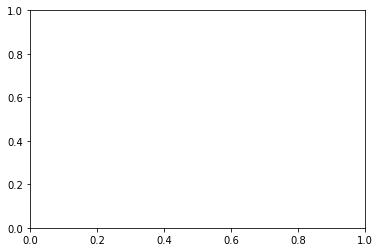

In [27]:
plt.plot(pd_hist,w_hist)

In [28]:
print(f'Found he weight and constant:{w_f,b_f}')


Found he weight and constant:(3.195080450204859, 0.43190541459138676)


In [29]:
x_test=test_norm['x']
y_test=test_norm['y']

c_y_test=w_f*x_test+b_f


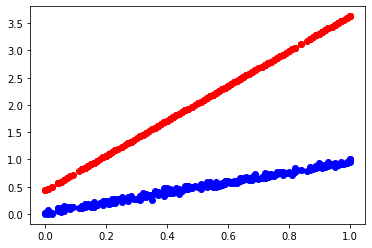

In [30]:
plt.scatter(x_test,y_test,c='blue')
plt.scatter(x_test,c_y_test,c='red')